In [ ]:
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torchvision.transforms as transforms
import torchvision
import torch.optim as optim
import torch.nn as nn
import pandas as pd
import numpy as np
from datetime import datetime

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

plt.ion()   # interactive mode

In [ ]:
label_frame = pd.read_csv('/content/drive/MyDrive/Second/LabelTrain2.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
label_frame.head()

,image,label
0,22928590@N00_identity_1@4699397735_0.jpg,0
1,22928590@N00_identity_1@4699546413_0.jpg,0
2,22928590@N00_identity_1@4699549267_0.jpg,0
3,22928590@N00_identity_1@4700282196_0.jpg,0
4,23924561@N00_identity_9@1350742519_0.jpg,0


In [ ]:
class Dataset(Dataset):

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.lable_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.lable_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        
        img_name = os.path.join(self.root_dir,self.lable_frame.iloc[idx, 0])
        image = io.imread(img_name)
        label = self.lable_frame.iloc[idx, 1]
        label = np.asarray(label)
        label = label.astype('float').reshape(1)

        sample = {'image': image, 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [ ]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""
    def __call__(self, sample):
        image, label = sample['image'], sample['label']
        # swap color axis because
        # numpy image: H x W x C
        # torch image: C x H x W
        image = image.transpose((2, 0, 1))
        return {'image': torch.FloatTensor(image),
                'label': torch.FloatTensor(label)}


In [ ]:
transformed_dataset = Dataset(csv_file='/content/drive/MyDrive/Second/LabelTrain2.csv',
                        root_dir=r'/content/drive/MyDrive/Second/Train',
                        transform=ToTensor())
# for i in range(len(transformed_dataset)):
#     sample = transformed_dataset[i]

#     print(i, sample['image'].size(), sample['label'].size())

#     if i == 3:
#         break

In [ ]:
transformedval_dataset = Dataset(csv_file='/content/drive/MyDrive/Second/LabelVal2.csv',
                        root_dir=r'/content/drive/MyDrive/Second/val',
                        transform=ToTensor())
# for i in range(len(transformedval_dataset)):
#     sample = transformedval_dataset[i]

#     print(i, sample['image'].size(), sample['label'].size())

#     if i == 3:
#         break
# print(len(transformedval_dataset))

In [ ]:
trainset = transformed_dataset
trainloader = DataLoader(trainset , batch_size=4,
                        shuffle=True, num_workers=2)
testset = transformedval_dataset
testloader = DataLoader(testset , batch_size=4,
                        shuffle=False, num_workers=2)
classes = ('small', 'big')



In [ ]:
trainloader.dataset.__getitem__(0)

{'image': tensor([[[143.,  45.,  47.,  ..., 198., 200., 198.],
          [ 61.,  53.,  50.,  ..., 198., 198., 204.],
          [ 48.,  39.,  44.,  ..., 207., 203., 199.],
          ...,
          [131., 110., 147.,  ..., 190., 183., 142.],
          [ 78.,  58., 103.,  ..., 185., 183., 151.],
          [ 67.,  61.,  77.,  ..., 192., 192., 190.]],
 
         [[144.,  44.,  46.,  ..., 199., 201., 199.],
          [ 60.,  52.,  49.,  ..., 198., 198., 203.],
          [ 47.,  38.,  40.,  ..., 207., 203., 199.],
          ...,
          [ 67.,  44.,  75.,  ..., 199., 192., 150.],
          [ 33.,   8.,  45.,  ..., 195., 192., 160.],
          [ 37.,  23.,  29.,  ..., 202., 201., 199.]],
 
         [[139.,  40.,  42.,  ..., 204., 206., 204.],
          [ 56.,  48.,  45.,  ..., 200., 200., 208.],
          [ 43.,  34.,  37.,  ..., 209., 205., 201.],
          ...,
          [ 39.,  20.,  60.,  ..., 214., 201., 153.],
          [  4.,   0.,  25.,  ..., 205., 197., 159.],
          [  9.,   0.,

In [ ]:

it = iter(trainloader)
data = next(it)
inputs, labels = data['image'], data['label']
print(inputs.shape)
print(labels.shape)

torch.Size([4, 3, 120, 120])
torch.Size([4, 1])


In [ ]:
if torch.cuda.is_available():
    print('using GPU, all good')
    device = torch.device('cuda:0')
else:
    print('using CPU, if you are in colab, please change the '
          'setting in /changeRuntimeType to GPU')
    device = torch.device('cpu')

using GPU, all good


In [ ]:
# class ZBLModule(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.norm1 = nn.BatchNorm2d(3)
#         self.conv1 = nn.Conv2d(3, 128, 3)
#         self.norm2 = nn.BatchNorm2d(128)
#         self.conv2 = nn.Conv2d(128, 256, 3)
#         self.pool = nn.MaxPool2d(2)
#         self.norm3 = nn.BatchNorm2d(256)
#         self.conv3 = nn.Conv2d(256, 16, 3)
#         self.pool = nn.MaxPool2d(2)
#         self.fc3 = nn.Linear(12544, 1280)
#         self.fc4 = nn.Linear(1280, 64)
#         self.fc5 = nn.Linear(64, 2)
#         self.flatten = nn.Flatten()
#         self.softmax = nn.Softmax(dim =1)
#         self.ReLU = nn.ReLU()

#     def forward(self, x):
#         # x shape (B, 3, 32, 32)
#         x = self.norm1(x)
#         x = self.conv1(x) # (B, 32, 120, 120)
#         x = self.ReLU(x)
#         x = self.norm2(x)
#         x = self.conv2(x) # (B, 64, 60, 60)
#         x = self.ReLU(x)
#         x = self.pool(x)
#         x = self.norm3(x)
#         x = self.conv3(x) # (B, 64, 60, 60)
#         x = self.ReLU(x)
#         x = self.pool(x) # (B, 64, 30, 30)
#         x = self.flatten(x)
#         x = self.fc3(x)
#         x = self.ReLU(x)
#         x = self.fc4(x)
#         x = self.ReLU(x)
#         x = self.fc5(x)
#         return x

In [ ]:
class yoyoBSModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.norm1 = nn.BatchNorm2d(3)
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.norm2 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.pool = nn.MaxPool2d(2)
        self.norm3 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.norm4 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 64, 3)
        self.norm5 = nn.BatchNorm2d(64)
        self.conv5 = nn.Conv2d(64, 32, 3)
        self.norm6 = nn.BatchNorm2d(32)
        self.fc6 = nn.Linear(3872, 2)
        self.flatten = nn.Flatten()
        self.softmax = nn.Softmax(dim =1)
        self.ReLU = nn.ReLU()

    def forward(self, x):
        x = self.conv1(x) 
        x = self.norm2(x)
        x = self.ReLU(x)
        x = self.conv2(x) 
        x = self.norm3(x)
        x = self.ReLU(x)
        x = self.pool(x) 
        x = self.conv3(x)
        x = self.norm4(x)
        x = self.ReLU(x)
        x = self.pool(x)
        x = self.conv4(x)
        x = self.norm5(x)
        x = self.ReLU(x)
        x = self.conv5(x)
        x = self.norm6(x)
        x = self.ReLU(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc6(x)
        return x

In [ ]:
from tqdm import tqdm

def train(args, model, trainloader, testloader):
    print(f'now training with {args}')
    model = model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=args['learning_rate'])
    weight=torch.tensor([1.0000,2.5529])
    criterion = nn.CrossEntropyLoss(weight.to(device))
    df = pd.DataFrame()
    last_time = datetime.now()
    for epoch in range(args['total_epoch']):
        training_loss = test_loss = 0
        training_acc = test_acc = 0
        model.train()
        for i, data in enumerate(tqdm(trainloader), 0):
            inputs, labels = data['image'], data['label']
            # move the tensors to gpu if we are using it
            # data loading happens in cpu so the tensors were there initially
            inputs, labels = inputs.to(device), labels.to(device=device, dtype=torch.long)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.view(-1))
            loss.backward()
            optimizer.step()
            # calculate stats
            training_loss += loss.item()
            _, prediceted = torch.max(outputs.data, 1)
            labels = labels.flatten()
            training_acc += (prediceted==labels).sum().item()

        # evaluate the model on validation set

        with torch.no_grad():
            model.eval()
            for i, data in enumerate(tqdm(testloader), 0):
                inputs, labels = data['image'], data['label']
                inputs, labels = inputs.to(device), labels.to(device=device, dtype=torch.long)
                outputs = model(inputs)
                loss = criterion(outputs, labels.view(-1))
                # calculate stats
                test_loss += loss.item()
                _, prediceted = torch.max(outputs.data, 1)
                labels = labels.flatten()
                test_acc += (prediceted == labels).sum().item()
        training_loss /= len(trainloader)
        training_acc /= len(trainset)
        test_loss /= len(testloader)
        test_acc /= len(testset)
        data = {
            'epoch':epoch,
            'training_loss': training_loss,
            'training_acc': training_acc,
            'test_loss': test_loss,
            'test_acc':test_acc,
            'time': (datetime.now()-last_time).total_seconds()
        }
        print(data)
        df = df.append(data, ignore_index=True)
        last_time = datetime.now()
    return model, df



now training with {'learning_rate': 1e-05, 'total_epoch': 3, 'l2': 0}


  0%|          | 0/2023 [00:00<?, ?it/s]

{'epoch': 0, 'training_loss': 0.6604898255456514, 'training_acc': 0.6644826307330943, 'test_loss': 0.6644852719366628, 'test_acc': 0.6191103789126854, 'time': 30.482191}


  0%|          | 0/2023 [00:00<?, ?it/s]

{'epoch': 1, 'training_loss': 0.5996714822369758, 'training_acc': 0.7238224749660032, 'test_loss': 0.6368884200203246, 'test_acc': 0.6540362438220758, 'time': 31.39175}


100%|██████████| 759/759 [00:06<00:00, 109.22it/s]


{'epoch': 2, 'training_loss': 0.5565170679817798, 'training_acc': 0.7602917542341452, 'test_loss': 0.5460116628248229, 'test_acc': 0.7654036243822075, 'time': 31.465969}


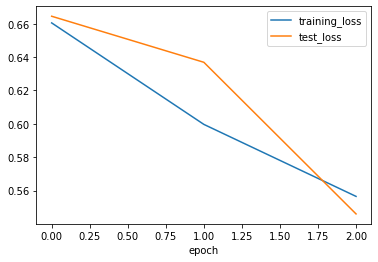

In [ ]:
args = {
    'learning_rate': 1e-5,
    'total_epoch': 3,
    'l2': 0,
}

# run it!
model = yoyoBSModule()

model, data = train(args, model, trainloader, testloader)

data.plot('epoch', ['training_loss', 'test_loss'])



In [ ]:
torch.save(model, '/content/drive/MyDrive/Second/yoyomodel.pt')

In [ ]:
args = {
    'learning_rate': 1e-5,
    'total_epoch': 15,
    'l2': 0,
}

# run it!
model2 = yoyoBSModule()

model2, data = train(args, model2, trainloader, testloader)

data.plot('epoch', ['training_loss', 'test_loss'])



In [ ]:
!nvidia-smi